## 1. Import thư viện

In [ ]:
# Tác dụng: Import các thư viện cần thiết và các hàm xử lý ảnh từ processing.py
# - numpy: Thư viện tính toán mảng
# - matplotlib: Hiển thị ảnh (KHÔNG dùng để xử lý)
# - PIL: Đọc file ảnh
# - processing: Chứa TẤT CẢ các hàm xử lý ảnh tự viết

import numpy as np
import matplotlib.pyplot as plt  # Chỉ dùng để hiển thị
from PIL import Image

# Import các hàm từ processing.py
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

from app.processing import (
    convert_to_gray,           # Chuyển RGB → Gray
    convolution_2d,            # Tích chập 2D (hàm core)
    gaussian_blur,             # Làm mịn Gaussian
    sobel_edge_detection,      # Phát hiện biên Sobel
    apply_laplacian_filter,    # Laplacian sharpening
    log_edge_detection,        # LoG edge detection
    bilateral_filter,          # Bilateral filter (giữ biên)
    edge_preserving_filter     # Anisotropic diffusion
)

plt.rcParams['figure.figsize'] = (15, 10)
print("✓ Import thành công")

✓ Import thành công


## 2. Đọc ảnh gốc (ảnh màu)

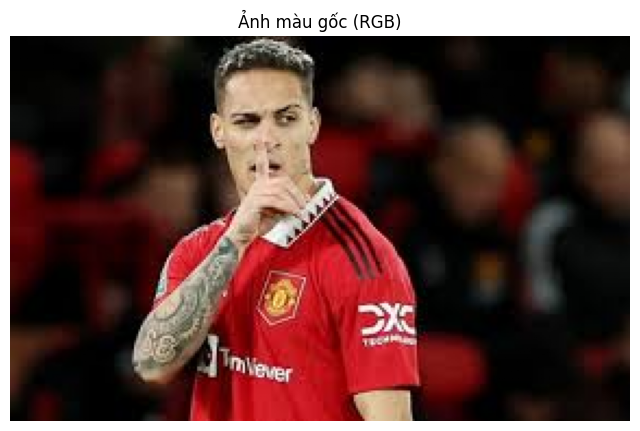

Kích thước ảnh: (177, 285, 3)


In [ ]:
# Tác dụng: Đọc file ảnh từ đĩa và chuyển thành mảng NumPy
# - Sử dụng PIL.Image.open() để đọc file
# - Chuẩn hóa giá trị pixel về [0, 1] bằng cách chia cho 255
# - Nếu không tìm thấy file, tạo ảnh mẫu ngẫu nhiên để demo

# Đọc ảnh
image_path = "C:\\Users\\ASUS\\Pictures\\anhlong.jfif"

try:
    img = Image.open(image_path)
    img_rgb = np.array(img) / 255.0  # Ảnh màu gốc [0, 1]
    
    # Hiển thị ảnh màu gốc
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title('Ảnh màu gốc (RGB)')
    plt.axis('off')
    plt.show()
    
    print(f"Kích thước ảnh: {img_rgb.shape}")
    
except FileNotFoundError:
    print(f"⚠ Không tìm thấy {image_path}, tạo ảnh mẫu...")
    # Tạo ảnh màu mẫu
    img_rgb = np.random.rand(300, 300, 3)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title('Ảnh mẫu')
    plt.axis('off')
    plt.show()

## 3. Chuyển sang ảnh xám
Sử dụng `convert_to_gray()` từ processing.py

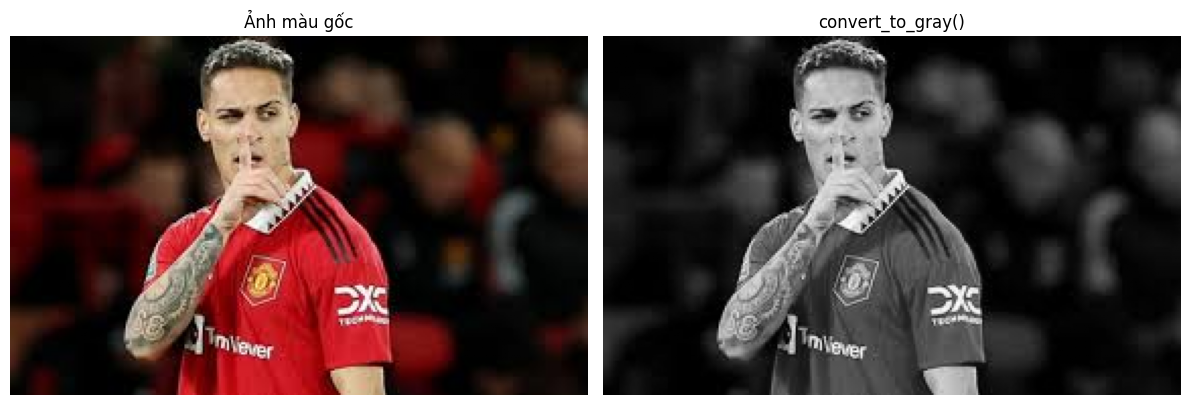

Ảnh xám shape: (177, 285)


In [ ]:
# Tác dụng: Chuyển đổi ảnh RGB sang ảnh xám (grayscale)
# - Sử dụng hàm convert_to_gray() TỰ VIẾT từ processing.py
# - Công thức: Gray = 0.299*R + 0.587*G + 0.114*B
# - Kết quả: Ảnh 2D (H, W) thay vì 3D (H, W, 3)

# Chuyển sang ảnh xám
gray_img = convert_to_gray(img_rgb)

# Hiển thị
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img_rgb)
axes[0].set_title('Ảnh màu gốc')
axes[0].axis('off')

axes[1].imshow(gray_img, cmap='gray')
axes[1].set_title('convert_to_gray()')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Ảnh xám shape: {gray_img.shape}")

## 4. Demo từng hàm riêng lẻ

### 4.1. Gaussian Blur

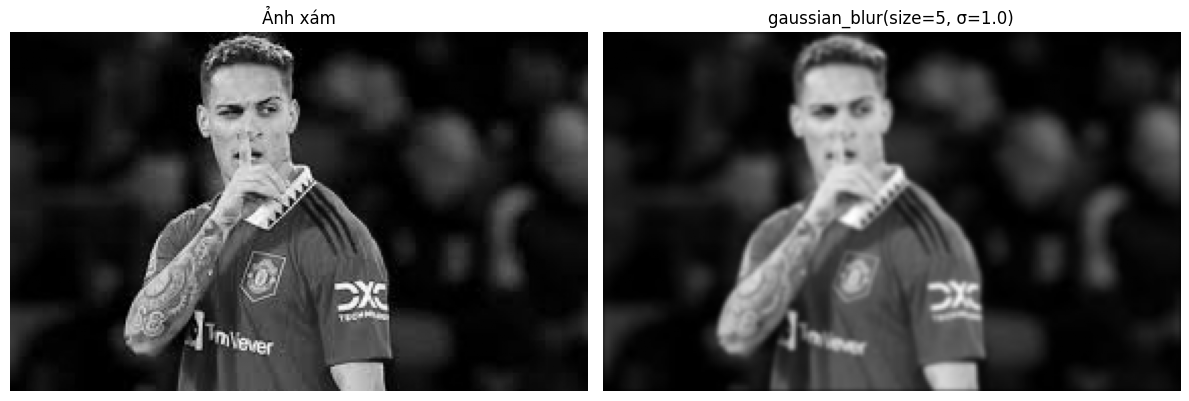

In [ ]:
# Tác dụng: Làm mịn ảnh bằng bộ lọc Gaussian
# - Tạo kernel Gaussian với kích thước (size x size)
# - Áp dụng tích chập (convolution_2d) lên ảnh
# - Kết quả: Ảnh mờ hơn, giảm nhiễu, mất chi tiết

# Áp dụng gaussian_blur
blurred = gaussian_blur(gray_img, size=5, sigma=1.0)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title('Ảnh xám')
axes[0].axis('off')

axes[1].imshow(blurred, cmap='gray')
axes[1].set_title('gaussian_blur(size=5, σ=1.0)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 4.2. Sobel Edge Detection

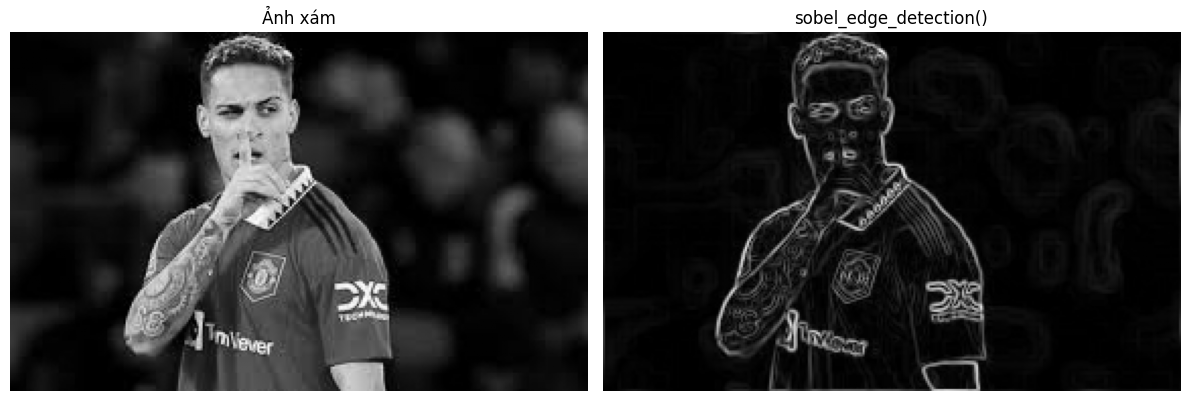

In [ ]:
# Tác dụng: Phát hiện các cạnh (biên) trong ảnh
# - Tính gradient theo hướng ngang (Gx) và dọc (Gy) bằng kernel Sobel
# - Kết hợp 2 gradient: Magnitude = sqrt(Gx² + Gy²)
# - Kết quả: Ảnh chỉ còn các đường viền, nền đen

# Phát hiện biên
edges = sobel_edge_detection(gray_img)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title('Ảnh xám')
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('sobel_edge_detection()')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 4.3. Laplacian Filter

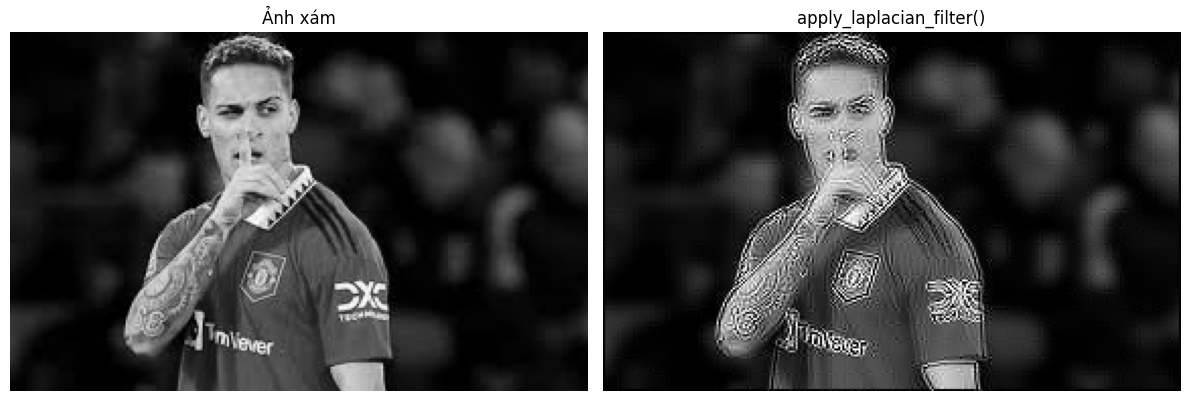

In [ ]:
# Tác dụng: Làm sắc nét ảnh, tăng cường chi tiết
# - Áp dụng kernel Laplacian (phát hiện vùng thay đổi cường độ)
# - Cộng kết quả Laplacian vào ảnh gốc
# - Kết quả: Ảnh sắc nét hơn, các cạnh rõ hơn

# Laplacian
sharpened = apply_laplacian_filter(gray_img)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title('Ảnh xám')
axes[0].axis('off')

axes[1].imshow(sharpened, cmap='gray')
axes[1].set_title('apply_laplacian_filter()')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 4.4. LoG (Laplacian of Gaussian)

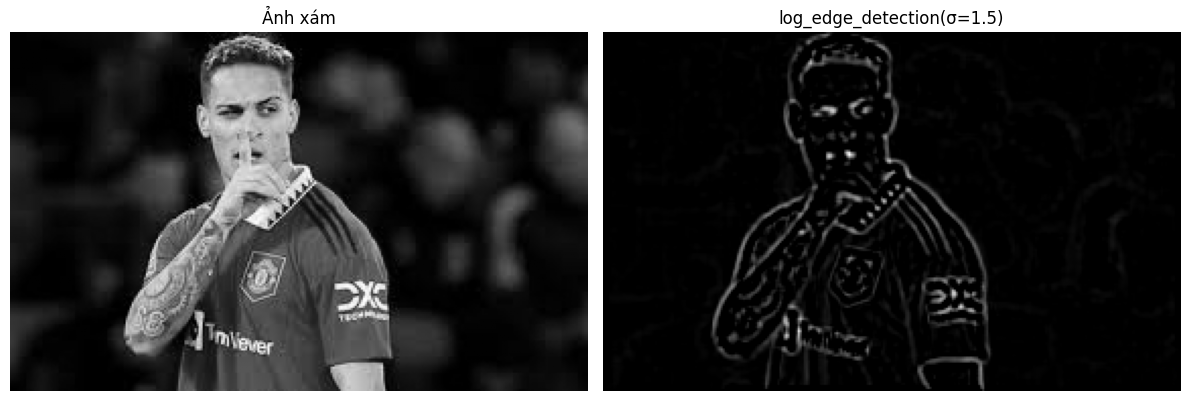

In [ ]:
# Tác dụng: Phát hiện biên chính xác hơn bằng cách kết hợp 2 bước
# - Bước 1: Làm mịn bằng Gaussian (giảm nhiễu)
# - Bước 2: Phát hiện biên bằng Laplacian
# - Kết quả: Các cạnh rõ ràng, ít bị nhiễu ảnh hưởng

# LoG
log_result = log_edge_detection(gray_img, sigma=1.5)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title('Ảnh xám')
axes[0].axis('off')

axes[1].imshow(log_result, cmap='gray')
axes[1].set_title('log_edge_detection(σ=1.5)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 4.5. Bilateral Filter

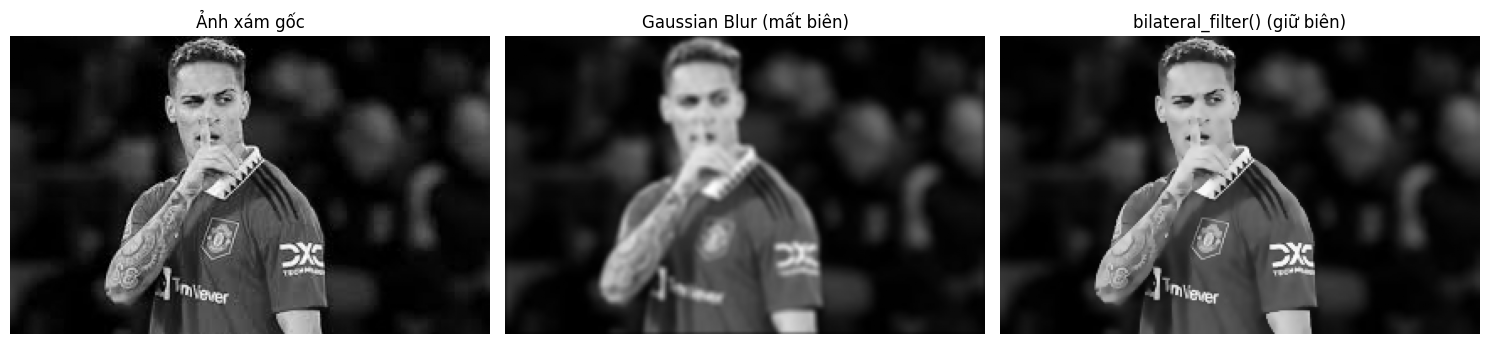

In [ ]:
# Tác dụng: Làm mịn ảnh NHƯNG VẪN GIỮ NGUYÊN các cạnh quan trọng
# - Kết hợp spatial kernel (khoảng cách) và range kernel (độ sáng)
# - Chỉ làm mịn các pixel có màu tương tự nhau
# - So với Gaussian Blur: Gaussian làm mờ cả biên, Bilateral giữ biên

# Bilateral filter
bilateral_result = bilateral_filter(gray_img, diameter=5, sigma_color=0.1, sigma_space=1.5)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title('Ảnh xám gốc')
axes[0].axis('off')

axes[1].imshow(gaussian_blur(gray_img, size=5, sigma=1.5), cmap='gray')
axes[1].set_title('Gaussian Blur (mất biên)')
axes[1].axis('off')

axes[2].imshow(bilateral_result, cmap='gray')
axes[2].set_title('bilateral_filter() (giữ biên)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### 4.6. Edge Preserving Filter

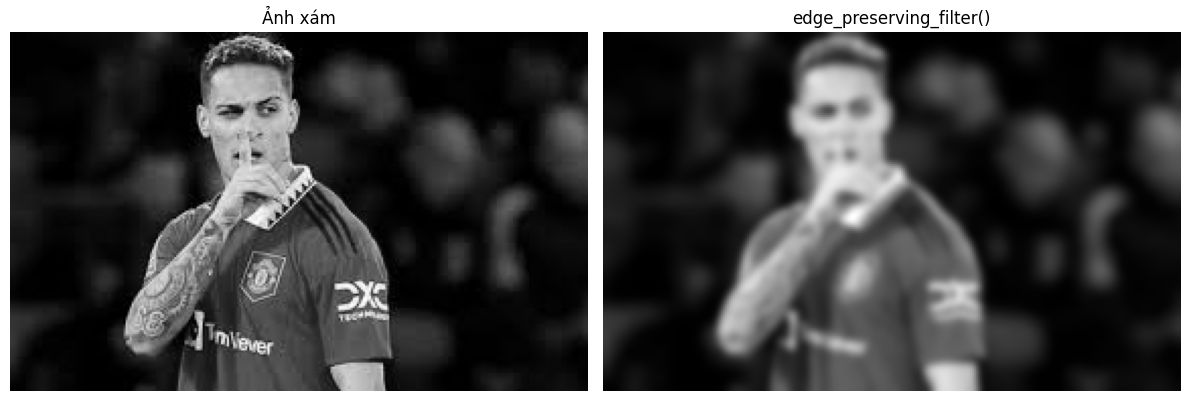

In [ ]:
# Tác dụng: Khử nhiễu nâng cao bằng Anisotropic Diffusion (Perona-Malik)
# - Tính gradient 4 hướng (North, South, East, West)
# - Điều chỉnh hệ số khuếch tán dựa trên gradient
# - Làm mịn vùng đồng nhất, giữ nguyên biên sắc nét
# - Kết quả: Ảnh mịn, ít nhiễu, biên rõ ràng

# Edge preserving filter
edge_preserved = edge_preserving_filter(gray_img, num_iterations=10, kappa=30.0, gamma=0.2, option=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title('Ảnh xám')
axes[0].axis('off')

axes[1].imshow(edge_preserved, cmap='gray')
axes[1].set_title('edge_preserving_filter()')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 5. So sánh 3 pipeline xử lý (giống ui.py)

Tác dụng: Demo 3 cách xử lý khác nhau để tạo tranh vẽ từ ảnh
- **Pipeline 1 (Mặc định):** Không dùng bộ lọc nâng cao
- **Pipeline 2 (+ Bilateral):** Thêm bilateral filter để giữ biên tốt hơn
- **Pipeline 3 (+ Edge-Preserving):** Thêm anisotropic diffusion để khử nhiễu tốt hơn

In [ ]:
# Tác dụng: Xử lý ảnh theo 3 pipeline khác nhau và so sánh kết quả
# Pipeline này GIỐNG CHÍNH XÁC logic trong ui.py

print("=== PIPELINE 1: Mặc định ===")
# Giống logic trong ui.py khi KHÔNG bật checkbox nào
# Luồng: Gray → Gaussian Blur → Sobel → Đảo màu
working_gray_1 = gray_img.copy()
blurred_1 = gaussian_blur(working_gray_1, size=5, sigma=1.0)
edges_1 = sobel_edge_detection(blurred_1)
sketch_1 = 1 - edges_1  # Đảo màu (nền trắng, nét đen)

print("\n=== PIPELINE 2: Thêm Bilateral Filter ===")
# Giống logic trong ui.py khi BẬT checkbox bilateral
# Luồng: Gray → Bilateral → Gaussian Blur → Sobel → Đảo màu
working_gray_2 = gray_img.copy()
working_gray_2 = bilateral_filter(working_gray_2, diameter=5, sigma_color=0.1, sigma_space=1.5)
blurred_2 = gaussian_blur(working_gray_2, size=5, sigma=1.0)
edges_2 = sobel_edge_detection(blurred_2)
sketch_2 = 1 - edges_2  # Đảo màu

print("\n=== PIPELINE 3: Thêm Edge-Preserving Filter ===")
# Giống logic trong ui.py khi BẬT checkbox edge-preserving
# Luồng: Gray → Edge-Preserving → Gaussian Blur → Sobel → Đảo màu
working_gray_3 = gray_img.copy()
working_gray_3 = edge_preserving_filter(working_gray_3, num_iterations=10, kappa=30.0, gamma=0.2, option=1)
blurred_3 = gaussian_blur(working_gray_3, size=5, sigma=1.0)
edges_3 = sobel_edge_detection(blurred_3)
sketch_3 = 1 - edges_3  # Đảo màu

print("\n✓ Đã xử lý xong 3 pipeline")

## 6. Hiển thị so sánh kết quả

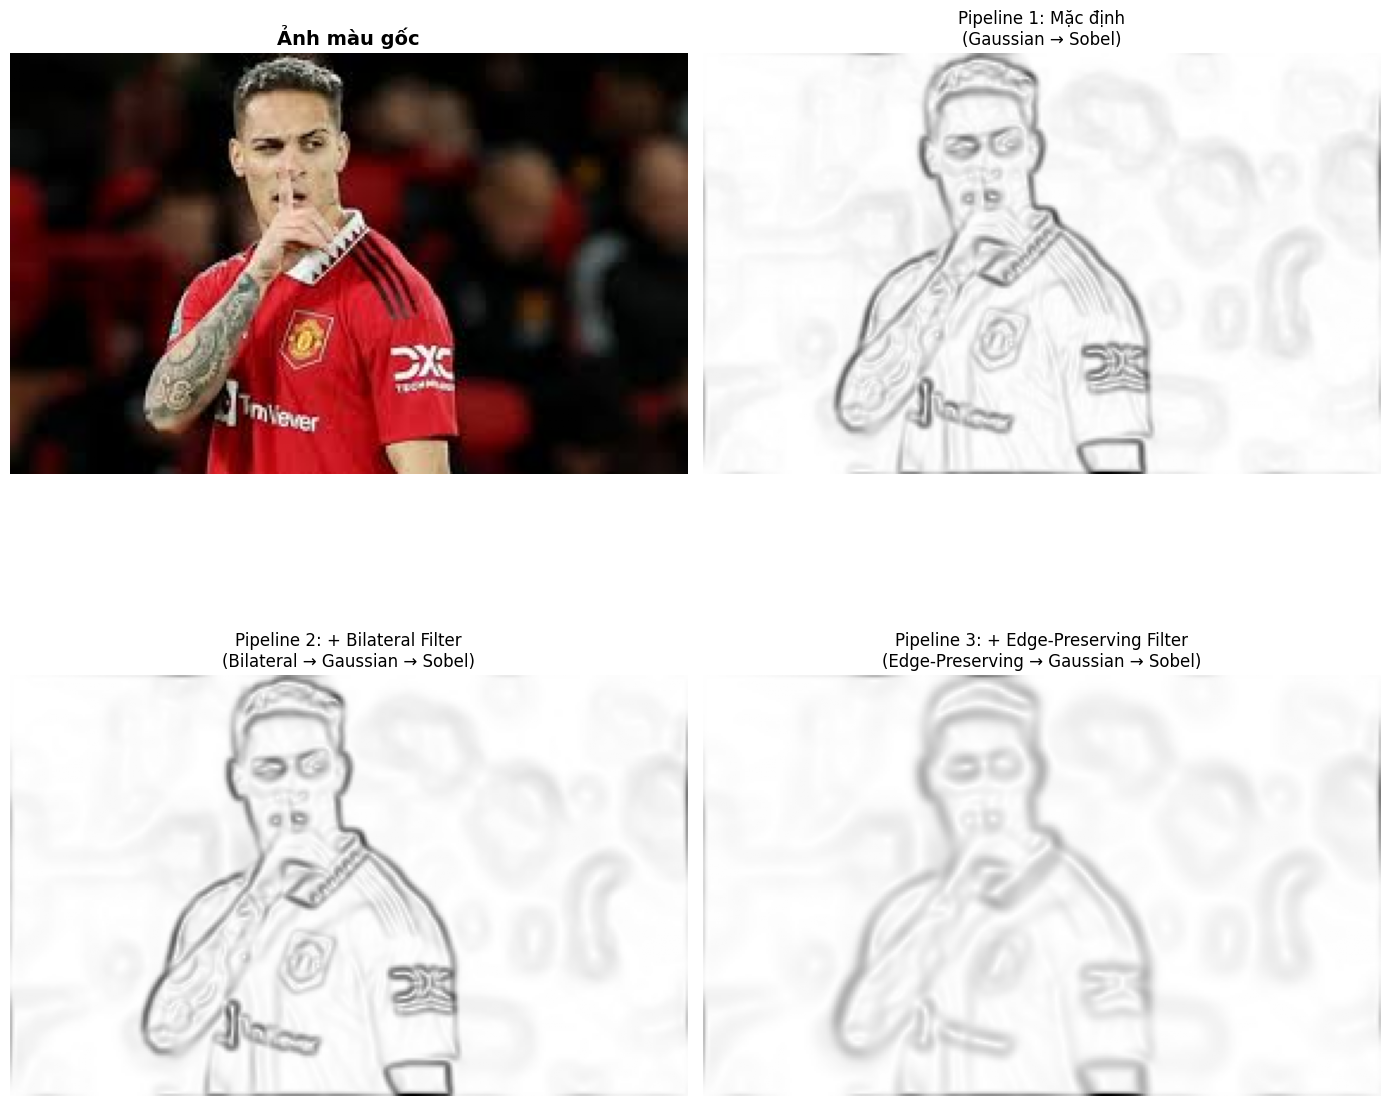

In [ ]:
# Tác dụng: Hiển thị ảnh gốc và 3 kết quả xử lý cạnh nhau để so sánh
# - Góc trên trái: Ảnh màu gốc
# - Góc trên phải: Pipeline 1 (Mặc định)
# - Góc dưới trái: Pipeline 2 (+ Bilateral)
# - Góc dưới phải: Pipeline 3 (+ Edge-Preserving)

# Hiển thị ảnh gốc và 3 kết quả
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Ảnh màu gốc
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title('Ảnh màu gốc', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

# Pipeline 1: Mặc định
axes[0, 1].imshow(sketch_1, cmap='gray')
axes[0, 1].set_title('Pipeline 1: Mặc định\n(Gaussian → Sobel)', fontsize=12)
axes[0, 1].axis('off')

# Pipeline 2: + Bilateral
axes[1, 0].imshow(sketch_2, cmap='gray')
axes[1, 0].set_title('Pipeline 2: + Bilateral Filter\n(Bilateral → Gaussian → Sobel)', fontsize=12)
axes[1, 0].axis('off')

# Pipeline 3: + Edge-Preserving
axes[1, 1].imshow(sketch_3, cmap='gray')
axes[1, 1].set_title('Pipeline 3: + Edge-Preserving Filter\n(Edge-Preserving → Gaussian → Sobel)', fontsize=12)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()